<h1>Test data generation</h1>

This scripts will show how we generated test data for you. Maybe you want to create your own data or extend the existing data? Feel free!

<h2>How to generate custom test data</h2>

Prerequisites: Install moduels in requirements.txt. Open a shell and execute:

```
pip install -r requirements.txt
```

<h2>Import and clean data</h2>

The list with addresses in file `data/addresses-ratisbona.csv` from the ratisbona region should be plenty for this challange. If you really need more data, the file with all german addresses is too large to be shared on github. Please download the full file here: https://www.wiwald.com/ds/10-millionen-deutsche-adressen-mit-geokoordinaten-urls-und-bezeichnungen/id/adr-20181110. Place the file under `raw/addresses-201811.csv`.



In [7]:
import pandas as pd

# read data
data = pd.read_csv('raw/adresses-201811.csv', delimiter=';')
# postal_code is of mixed type... we transform it to integer
data['postal_code'] = pd.to_numeric(data['postal_code'], errors='coerce', downcast='integer').round().astype('Int64')
# there are two columns we are not interessted in so we drop it
data.drop(columns=["tag_name","tag_website"], inplace=True)
data.to_csv('raw/all-addresses.csv', index=False)

/tmp/ipykernel_105139/3352469164.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw/adresses-201811.csv', delimiter=';')


<h2>Generate sample data</h2>

<h3>Fake people with valid addresses</h3>

We will retrieve 10000 valid addresses from ratisbona region and merge it with 10000 fake names. The result is a dataset with 10000 fake people with valid addresses and geo locations.

In [11]:
data = pd.read_csv('raw/all-addresses.csv')
# get only postal_codes in Regensburg are
data.query('postal_code > 93000 & postal_code < 93300', inplace=True)

# get 10000 sample entries
data.sample(n = 10000, replace = True)

# generate new id column
data.reset_index(drop=True, inplace=True)
data["id"] = data.index+1
data['postal_code'] = pd.to_numeric(data['postal_code'], errors='coerce', downcast='integer').round().astype('Int64')

# write to new CSV file
data.to_csv('data/ratisbona-addresses.csv', index=False)

# Combine addresses and people to generate 10000 valid entries
new_data = pd.merge(pd.read_csv('data/people.csv'), data, on='id', how='inner')
new_data.to_csv('data/people-with-addresses.csv', index=False)


<h3>Companies</h3>

The file `data/ratisbona-companies.csv` contains valid entries for around 2000 companies located in ratisbona including geographic data.

<h4>Combine companies with people</h4>

In [19]:
# Implement your own code here

<h2>Plot sample data</h2>

(11.0907, 13.6615, 48.4583, 49.7014)


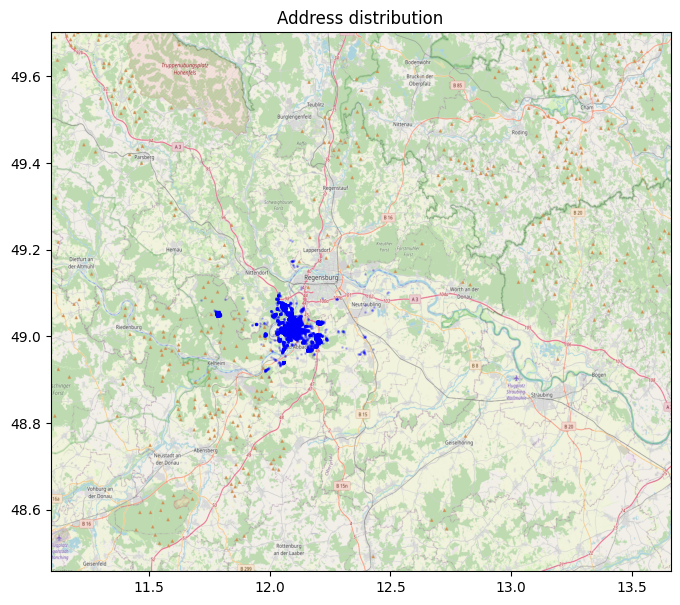

In [21]:
import matplotlib.pyplot as plt

data = pd.read_csv('data/people-with-addresses.csv')

# BBox = (new_data.lon.min(), new_data.lon.max(),      
#         new_data.lat.min(),  new_data.lat.max())

BBox = (
        11.0907, 13.6615,
        48.4583, 49.7014 )

print(BBox)

map_image = plt.imread('map.png')
fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(data.lon, data.lat, zorder=1, alpha= 0.2, c='b', s=1)

ax.set_title('Address distribution')

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

ax.imshow(map_image, zorder=0, extent = BBox, aspect= 'auto')



OpenStreetMap